<a href="https://colab.research.google.com/github/saaibharath/EDA-Hospitality-Domain/blob/main/EDA_Hospitality_Domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Import and Exploration**

In [ ]:
#Data import and Exploration
import pandas as pd

**Exploring bookings data**

In [ ]:
df_bookings = pd.read_csv("datasets/fact_bookings.csv")
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [ ]:
df_bookings.shape

(134590, 12)

In [ ]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [ ]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [ ]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

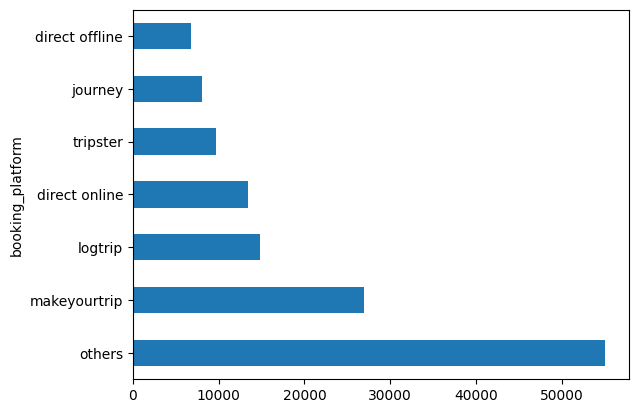

In [ ]:
df_bookings.booking_platform.value_counts().plot(kind="barh")

In [ ]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Reading other files**

In [ ]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [ ]:
df_hotels.shape

(25, 4)

In [ ]:
df_hotels.head(10)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [ ]:
df_hotels["category"].value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

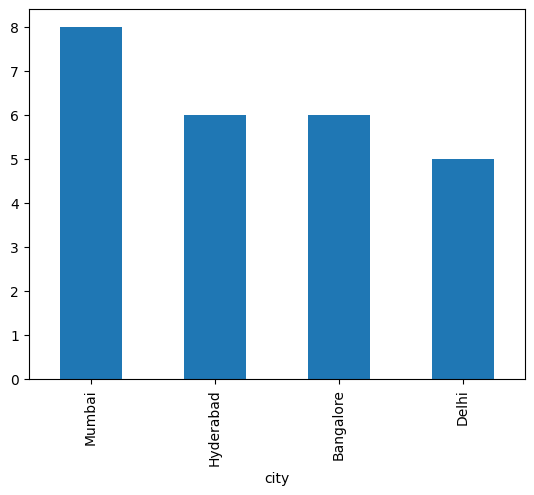

In [ ]:
df_hotels.city.value_counts().plot(kind="bar")

**Excercise: Exploring aggregate bookings**

In [ ]:
df_agg_bookings.head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
6,19558,1-May-22,RT1,25,40.0
7,19560,1-May-22,RT1,23,26.0
8,17561,1-May-22,RT1,22,NaN
9,16560,1-May-22,RT1,24,34.0


**Finding unique property ids in aggregate bookings dataset**

In [ ]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

**Finding total bookings per property_id**

In [ ]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

**Finding out the days on which bookings are greater than capacity**

In [ ]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


**Finding properties that have highest capacity**

In [ ]:
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


**2. Data Cleaning**

In [ ]:
#Data Cleaning
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Cleaning invalid no. of guests**

In [ ]:
df_bookings = df_bookings[df_bookings.no_guests > 0]
df_bookings.head(10)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
8,May012216558RT19,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,tripster,NaN,Checked Out,9100,9100
9,May012216558RT110,16558,28-04-22,1/5/2022,2/5/2022,1.0,RT1,others,4.0,Checked Out,9100,9100
10,May012216558RT111,16558,29-04-22,1/5/2022,7/5/2022,1.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100
11,May012216558RT112,16558,26-04-22,1/5/2022,2/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100,9100


In [ ]:
df_bookings.shape

(134578, 12)

**Outlier removal in revenue generated**

In [ ]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [ ]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(15378.036937686695, 13500.0)

In [ ]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
high_lim, low_lim = avg + std*3, avg - std*3 #Finding outliers
high_lim, low_lim

(294498.50173207896, -263742.4278567056)

In [ ]:
df_bookings[df_bookings.revenue_generated <= 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [ ]:
df_bookings[df_bookings.revenue_generated > high_lim]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [ ]:
df_bookings = df_bookings[df_bookings.revenue_generated <= high_lim]
df_bookings.shape

(134573, 12)

In [ ]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [ ]:
avg, std = df_bookings.revenue_realized.mean(), df_bookings.revenue_realized.std()
high_lim, low_lim = avg + 3*std, avg - 3*std
high_lim, low_lim

(33479.358661845814, -8087.391491611072)

In [ ]:
df_bookings[df_bookings.revenue_realized > high_lim]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


RT-4 room category is Presidential type which is more luxurious, so they can have higher rent
So, to perform fair analysis, perform data analysis only on RT-4 room category rooms

In [ ]:
df_bookings[df_bookings.room_category == "RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [ ]:
high_lim, low_lim = 23439 + 3*9048, 23439 - 3*9048
high_lim #There is no outlier since the higher limit is 50583 and max = 45220

50583

Therefore there is no outlier so no need to do data cleaning on this column

In [ ]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Since, not everyone came to hotel will give ratings, you can leave it.

**Excercise-1**
Finding columns in aggregate bookings that have null values.
Fill these null values with appropriate substitute

In [ ]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [ ]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


Filling the null values with median

In [ ]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)
df_agg_bookings

C:\Users\hp\AppData\Local\Temp\ipykernel_13892\2708754821.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)


,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [ ]:
df_agg_bookings.capacity.loc[[8,15]]

8     25.0
15    25.0
Name: capacity, dtype: float64

**Excercise-2:**
Filtering the records where successful_bookings values are greater than the capacity values

In [ ]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [ ]:
df_agg_bookings.shape

(9200, 5)

In [ ]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity]
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [ ]:
df_agg_bookings.shape

(9194, 5)

**3. Data Transformation**
Creating 'Occupancy percentage' column

In [ ]:
new_col = df_agg_bookings.apply(lambda row: round((row['successful_bookings']/row['capacity'])*100, 2), axis=1)
df_agg_bookings = df_agg_bookings.assign(occupancy_percentage=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [ ]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [ ]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           9194 non-null   int64  
 1   check_in_date         9194 non-null   object 
 2   room_category         9194 non-null   object 
 3   successful_bookings   9194 non-null   int64  
 4   capacity              9194 non-null   float64
 5   occupancy_percentage  9194 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 760.8+ KB


**Insights generation**

1. Average occupancy rate in each of the room categories

In [ ]:
df_agg_bookings.groupby("room_category")["occupancy_percentage"].mean().round(2)

room_category
RT1    57.89
RT2    58.01
RT3    58.03
RT4    59.28
Name: occupancy_percentage, dtype: float64

Replacing the room category names such as RT1, RT2... with Standard, Premium, Elite...

In [ ]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [ ]:
df1 = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df1.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard


In [ ]:
df1.drop("room_id", axis=1,inplace=True)
df1.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard


Average occupancy percentage per room class

In [ ]:
df1.groupby("room_class")["occupancy_percentage"].mean()

room_class
Elite           58.009756
Premium         58.028213
Presidential    59.277925
Standard        57.889643
Name: occupancy_percentage, dtype: float64

2. Average occupancy rate per city

In [ ]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
df1[df1["room_class"]=="Standard"].occupancy_percentage.mean()

57.88964285714285

In [ ]:
df1 = pd.merge(df1, df_hotels, on="property_id")
df1.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore


In [ ]:
df1.groupby("city")["occupancy_percentage"].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.909181
Name: occupancy_percentage, dtype: float64

3. When was occupancy better? Weekday or weekend?

In [ ]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [ ]:
df1 = pd.merge(df1, df_date, left_on="check_in_date", right_on="date")
df1.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [ ]:
df1.groupby("day_type")["occupancy_percentage"].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occupancy_percentage, dtype: float64

4. In june month, what is the occupancy for different cities

In [ ]:
df_june_22 = df1[df1["mmm yy"]=="Jun 22"]
df_june_22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday


In [ ]:
df_june_22.groupby("city")["occupancy_percentage"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: occupancy_percentage, dtype: float64

<Axes: xlabel='city'>

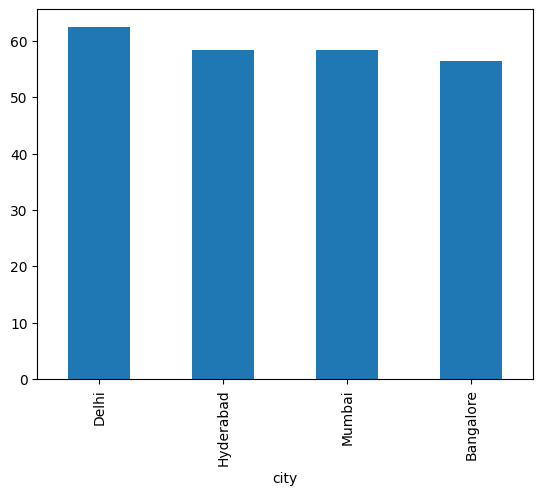

In [ ]:
df_june_22.groupby("city")["occupancy_percentage"].mean().round(2).sort_values(ascending=False).plot(kind="bar")

5. Got new data for August month. Include this data in existing data

In [ ]:
df_aug = pd.read_csv("datasets/new_data_august.csv")
df_aug.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [ ]:
df_aug.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [ ]:
df_aug.shape

(7, 13)

In [ ]:
df1.shape

(6497, 14)

In [ ]:
latest_data = pd.concat([df1, df_aug], ignore_index=True, axis=0)
latest_data.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6494,17558,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6495,19563,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Palace,Business,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6496,17561,31-Jul-22,RT4,3,4.0,75.0,Presidential,Atliq Blu,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6497,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6498,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [ ]:
latest_data.shape

(6504, 15)

6. Print revenue realized per city

In [ ]:
df_bookings.head(10)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
8,May012216558RT19,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,tripster,NaN,Checked Out,9100,9100
9,May012216558RT110,16558,28-04-22,1/5/2022,2/5/2022,1.0,RT1,others,4.0,Checked Out,9100,9100
10,May012216558RT111,16558,29-04-22,1/5/2022,7/5/2022,1.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100
11,May012216558RT112,16558,26-04-22,1/5/2022,2/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100,9100
12,May012216558RT113,16558,26-04-22,1/5/2022,7/5/2022,2.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100


In [ ]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(10)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi
5,May012216558RT19,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,tripster,NaN,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
6,May012216558RT110,16558,28-04-22,1/5/2022,2/5/2022,1.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
7,May012216558RT111,16558,29-04-22,1/5/2022,7/5/2022,1.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
8,May012216558RT112,16558,26-04-22,1/5/2022,2/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
9,May012216558RT113,16558,26-04-22,1/5/2022,7/5/2022,2.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [ ]:
df_bookings_all.groupby("city")["revenue_realized"].sum().sort_values(ascending=False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

7. Print month by month revenue

In [ ]:
df_date.head(10)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
5,06-May-22,May 22,W 19,weekeday
6,07-May-22,May 22,W 19,weekend
7,08-May-22,May 22,W 20,weekend
8,09-May-22,May 22,W 20,weekeday
9,10-May-22,May 22,W 20,weekeday


In [ ]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [ ]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [ ]:
df_date.date = pd.to_datetime(df_date.date)
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [ ]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [ ]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])
print(df_bookings_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      0 non-null       datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [ ]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,NaT,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,NaT,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,NaT,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,NaT,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,NaT,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [ ]:
print(df_bookings_all[df_bookings_all["check_in_date"].isna()]["check_in_date"])

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
134568   NaT
134569   NaT
134570   NaT
134571   NaT
134572   NaT
Name: check_in_date, Length: 134573, dtype: datetime64[ns]


In [ ]:
print(df_bookings_all[df_bookings_all["check_in_date"].isna()][["booking_id", "check_in_date"]])

               booking_id check_in_date
0        May012216558RT12           NaT
1        May012216558RT15           NaT
2        May012216558RT16           NaT
3        May012216558RT17           NaT
4        May012216558RT18           NaT
...                   ...           ...
134568   Jul312217564RT45           NaT
134569   Jul312217564RT46           NaT
134570   Jul312217564RT48           NaT
134571   Jul312217564RT49           NaT
134572  Jul312217564RT410           NaT

[134573 rows x 2 columns]


In [ ]:
df_bookings_all.loc[df_bookings_all["check_in_date"].isna(), "check_in_date"] = df_bookings_all["booking_date"]
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], errors="coerce")

In [ ]:
df_bookings_all = df_bookings_all.dropna(subset=["check_in_date"])

In [ ]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-04-30,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-04-27,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-04-28,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,2022-04-26,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [ ]:
# Convert both columns to datetime
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], errors="coerce")

In [ ]:
df_date["date"] = pd.to_datetime(df_date["date"], errors="coerce")

C:\Users\hp\AppData\Local\Temp\ipykernel_13892\2967241087.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"] = pd.to_datetime(df_date["date"], errors="coerce")


In [ ]:
print(df_bookings_all.dtypes)

booking_id                   object
property_id                   int64
booking_date                 object
check_in_date        datetime64[ns]
checkout_date                object
no_guests                   float64
room_category                object
booking_platform             object
ratings_given               float64
booking_status               object
revenue_generated             int64
revenue_realized              int64
property_name                object
category                     object
city                         object
date                 datetime64[ns]
mmm yy                       object
week no                      object
day_type                     object
dtype: object


In [ ]:
print(df_date.dtypes)

date        datetime64[ns]
mmm yy              object
week no             object
day_type            object
dtype: object


In [ ]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")

In [ ]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,category,city,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
0,May012216558RT21,16558,7/4/2022,2022-07-04,6/5/2022,2.0,RT2,others,NaN,Checked Out,...,Luxury,Delhi,2022-07-04,Jul 22,W 28,weekeday,2022-07-04,Jul 22,W 28,weekeday
1,May012216559RT320,16559,7/4/2022,2022-07-04,2/5/2022,3.0,RT3,others,NaN,Cancelled,...,Luxury,Mumbai,2022-07-04,Jul 22,W 28,weekeday,2022-07-04,Jul 22,W 28,weekeday
2,May012216560RT22,16560,7/4/2022,2022-07-04,2/5/2022,2.0,RT2,others,3.0,Checked Out,...,Business,Delhi,2022-07-04,Jul 22,W 28,weekeday,2022-07-04,Jul 22,W 28,weekeday
3,May012216560RT43,16560,7/4/2022,2022-07-04,2/5/2022,2.0,RT4,others,NaN,Cancelled,...,Business,Delhi,2022-07-04,Jul 22,W 28,weekeday,2022-07-04,Jul 22,W 28,weekeday
4,May012216561RT11,16561,7/4/2022,2022-07-04,3/5/2022,2.0,RT1,tripster,NaN,Checked Out,...,Luxury,Delhi,2022-07-04,Jul 22,W 28,weekeday,2022-07-04,Jul 22,W 28,weekeday


In [ ]:
# Drop the duplicate columns
df_bookings_all = df_bookings_all.drop(columns=["date_y", "mmm yy_y", "week no_y", "day_type_y"])

In [ ]:
df_bookings_all.rename(columns={"date_x": "date", "mmm yy_x": "mmm yy", "week no_x": "week no", "day_type_x": "day_type"}, inplace=True)

In [ ]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT21,16558,7/4/2022,2022-07-04,6/5/2022,2.0,RT2,others,NaN,Checked Out,12600,12600,Atliq Grands,Luxury,Delhi,2022-07-04,Jul 22,W 28,weekeday
1,May012216559RT320,16559,7/4/2022,2022-07-04,2/5/2022,3.0,RT3,others,NaN,Cancelled,22440,8976,Atliq Exotica,Luxury,Mumbai,2022-07-04,Jul 22,W 28,weekeday
2,May012216560RT22,16560,7/4/2022,2022-07-04,2/5/2022,2.0,RT2,others,3.0,Checked Out,12600,12600,Atliq City,Business,Delhi,2022-07-04,Jul 22,W 28,weekeday
3,May012216560RT43,16560,7/4/2022,2022-07-04,2/5/2022,2.0,RT4,others,NaN,Cancelled,26600,10640,Atliq City,Business,Delhi,2022-07-04,Jul 22,W 28,weekeday
4,May012216561RT11,16561,7/4/2022,2022-07-04,3/5/2022,2.0,RT1,tripster,NaN,Checked Out,9100,9100,Atliq Blu,Luxury,Delhi,2022-07-04,Jul 22,W 28,weekeday


In [ ]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    326160921
Jun 22    390123323
May 22    398286993
Name: revenue_realized, dtype: int64

**Exercise-1:**

Print revenue realized per hotel type

In [ ]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Palace', 'Atliq Bay', 'Atliq Seasons'], dtype=object)

In [ ]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     44879898
Atliq Grands     135906995
Atliq Bay        166244948
Atliq Blu        167687033
Atliq City       191395886
Atliq Palace     202000365
Atliq Exotica    206456112
Name: revenue_realized, dtype: int64

**Exercise-2:** Print average rating per city

In [ ]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

**Exercise-3:** Print a pie chart of revenue realized per booking platform

<Axes: ylabel='revenue_realized'>

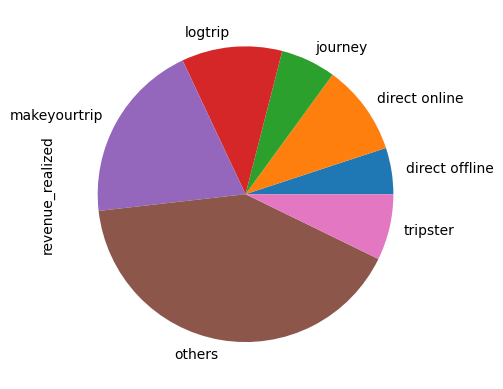

In [ ]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")